
Variable	Definition	Key
- Survived	Survival	0 = No, 1 = Yes
- Pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- Sex	Sex
- Age	Age in years
- Sibsp	# of siblings / spouses aboard the Titanic
- Parch	# of parents / children aboard the Titanic
- Ticket	Ticket number
- Fare	Passenger fare
- Cabin	Cabin number
- Embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown,S = Southampton


#Loading Dataset

In [2]:
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

In [3]:
import pandas as pd

df = pd.DataFrame(titanic)
df_target = df['survived']

In [4]:
# Print the first few rows of the dataset
df.head(30)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


#EDA

In [5]:
df.shape

(891, 15)

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- Deck column have to many missing values, best is to remove.
- Age column's missing values are less than 20% of the columns

In [7]:
# Drop the 'deck' column if it exists
if 'deck' in df.columns:
    df.drop(columns=['deck'], inplace=True)

# Now, verify if 'deck' column has been dropped
print(df.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [8]:
df.who

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: object

In [9]:
df['class']

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [10]:
# Drop the 'deck' column if it exists
if 'class' in df.columns:
    df.drop(columns=['class'], inplace=True)

# Now, verify if 'deck' column has been dropped
print(df.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')


In [11]:
# Drop the 'deck' column if it exists
if 'who' in df.columns:
    df.drop(columns=['who'], inplace=True)

# Now, verify if 'deck' column has been dropped
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')


In [12]:
# Drop the 'deck' column if it exists
if 'who' in df.columns:
    df.drop(columns=['who'], inplace=True)

# Now, verify if 'deck' column has been dropped
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')


In [13]:
# Drop the 'deck' column if it exists
if 'adult_male' in df.columns:
    df.drop(columns=['adult_male'], inplace=True)

# Now, verify if 'deck' column has been dropped
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'embark_town', 'alive', 'alone'],
      dtype='object')


- Class column is a copy of pclass column.
- Who and Adult_male have the same information as sex column.

In [14]:
# Drop the 'deck' column if it exists
if 'embark_town' in df.columns:
    df.drop(columns=['embark_town'], inplace=True)

# Now, verify if 'deck' column has been dropped
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'alive', 'alone'],
      dtype='object')


In [15]:
# Drop the 'deck' column if it exists
if 'alive' in df.columns:
    df.drop(columns=['alive'], inplace=True)

# Now, verify if 'deck' column has been dropped
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'alone'],
      dtype='object')


In [16]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
alone          bool
dtype: object

In [18]:
# Convert 'survived' column to categorical data type
df['survived'] = df['survived'].astype('category')
df['pclass'] = df['pclass'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['sex'] = df['sex'].astype('category')

In [19]:
df.dtypes

survived    category
pclass      category
sex         category
age          float64
sibsp          int64
parch          int64
fare         float64
embarked    category
alone           bool
dtype: object

In [20]:
# Dropping rows with missing values
df = df.dropna()

# Print the cleaned DataFrame
print(df)

    survived pclass     sex   age  sibsp  parch     fare embarked  alone
0          0      3    male  22.0      1      0   7.2500        S  False
1          1      1  female  38.0      1      0  71.2833        C  False
2          1      3  female  26.0      0      0   7.9250        S   True
3          1      1  female  35.0      1      0  53.1000        S  False
4          0      3    male  35.0      0      0   8.0500        S   True
..       ...    ...     ...   ...    ...    ...      ...      ...    ...
885        0      3  female  39.0      0      5  29.1250        Q  False
886        0      2    male  27.0      0      0  13.0000        S   True
887        1      1  female  19.0      0      0  30.0000        S   True
889        1      1    male  26.0      0      0  30.0000        C   True
890        0      3    male  32.0      0      0   7.7500        Q   True

[712 rows x 9 columns]


##Univariate Analysis

###Histograms

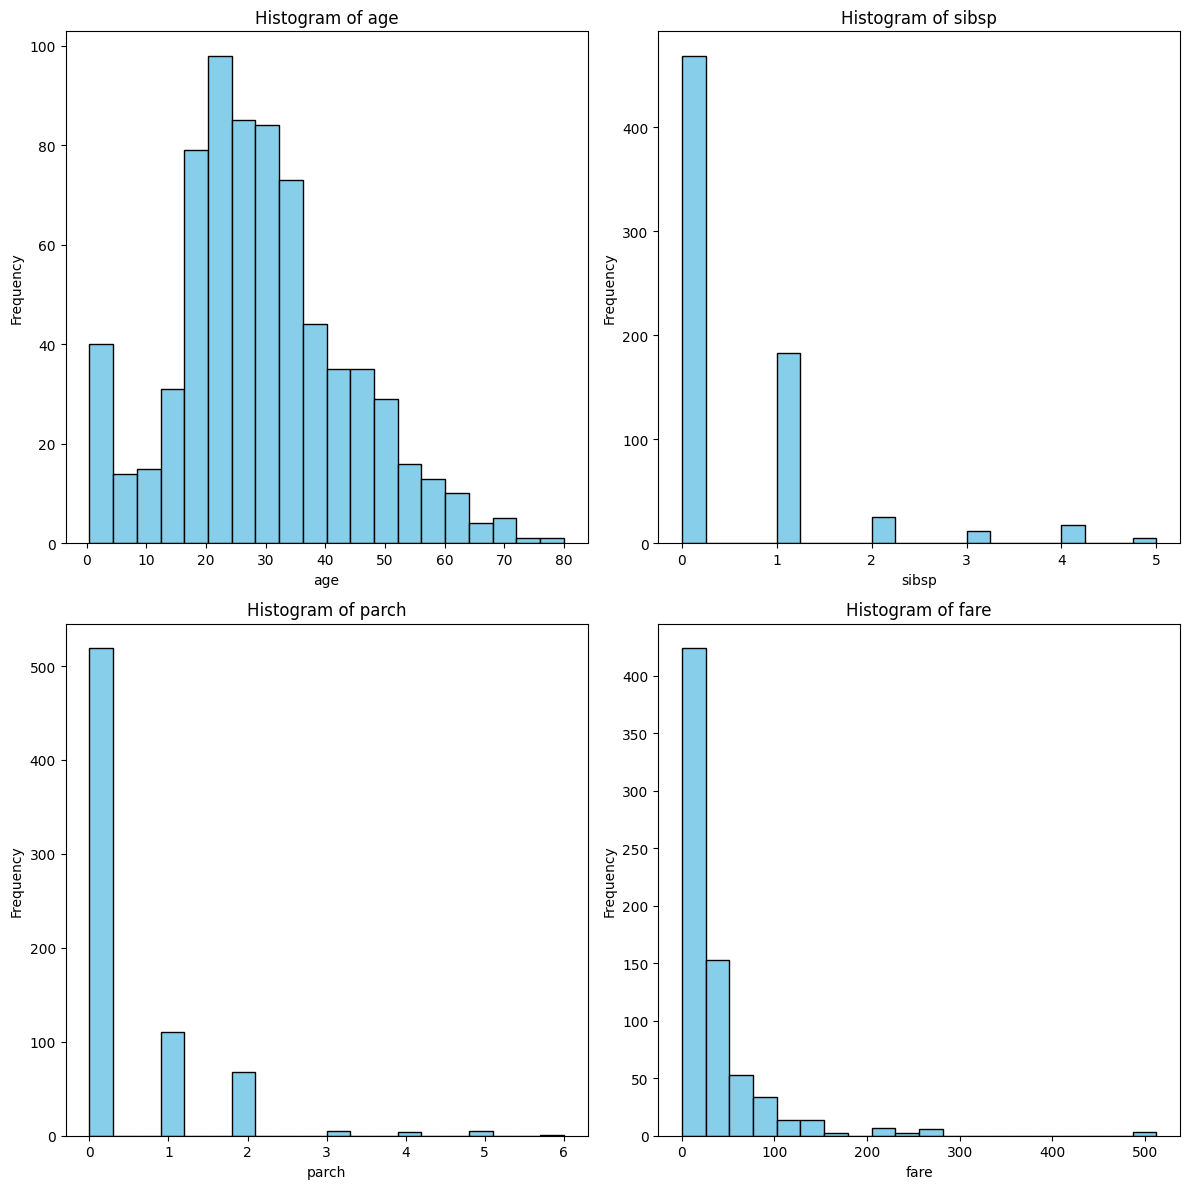

In [21]:
import matplotlib.pyplot as plt

# Assuming you already have loaded the Titanic dataset into a DataFrame called df
# and you have dropped the 'deck' column as per your previous steps

# Filter out numerical columns for which to build histograms
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
num_plots = len(numerical_columns)
num_rows = num_plots // 2 + num_plots % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
axes = axes.flatten()

# Build histograms for numerical features
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    df[col].plot(kind='hist', ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# If there are extra subplots, remove them
if len(numerical_columns) < len(axes):
    for j in range(len(numerical_columns), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


- The age histogram is the closest one to a normal distribution, a little right-skewed though.

- Sibsp, Parch and Fare are all right-skewed.

- Majority of passengers were between 20-35 years old, most of them had no siblings / spouses, no parents / children and paid a low fare.

###Bar Plots


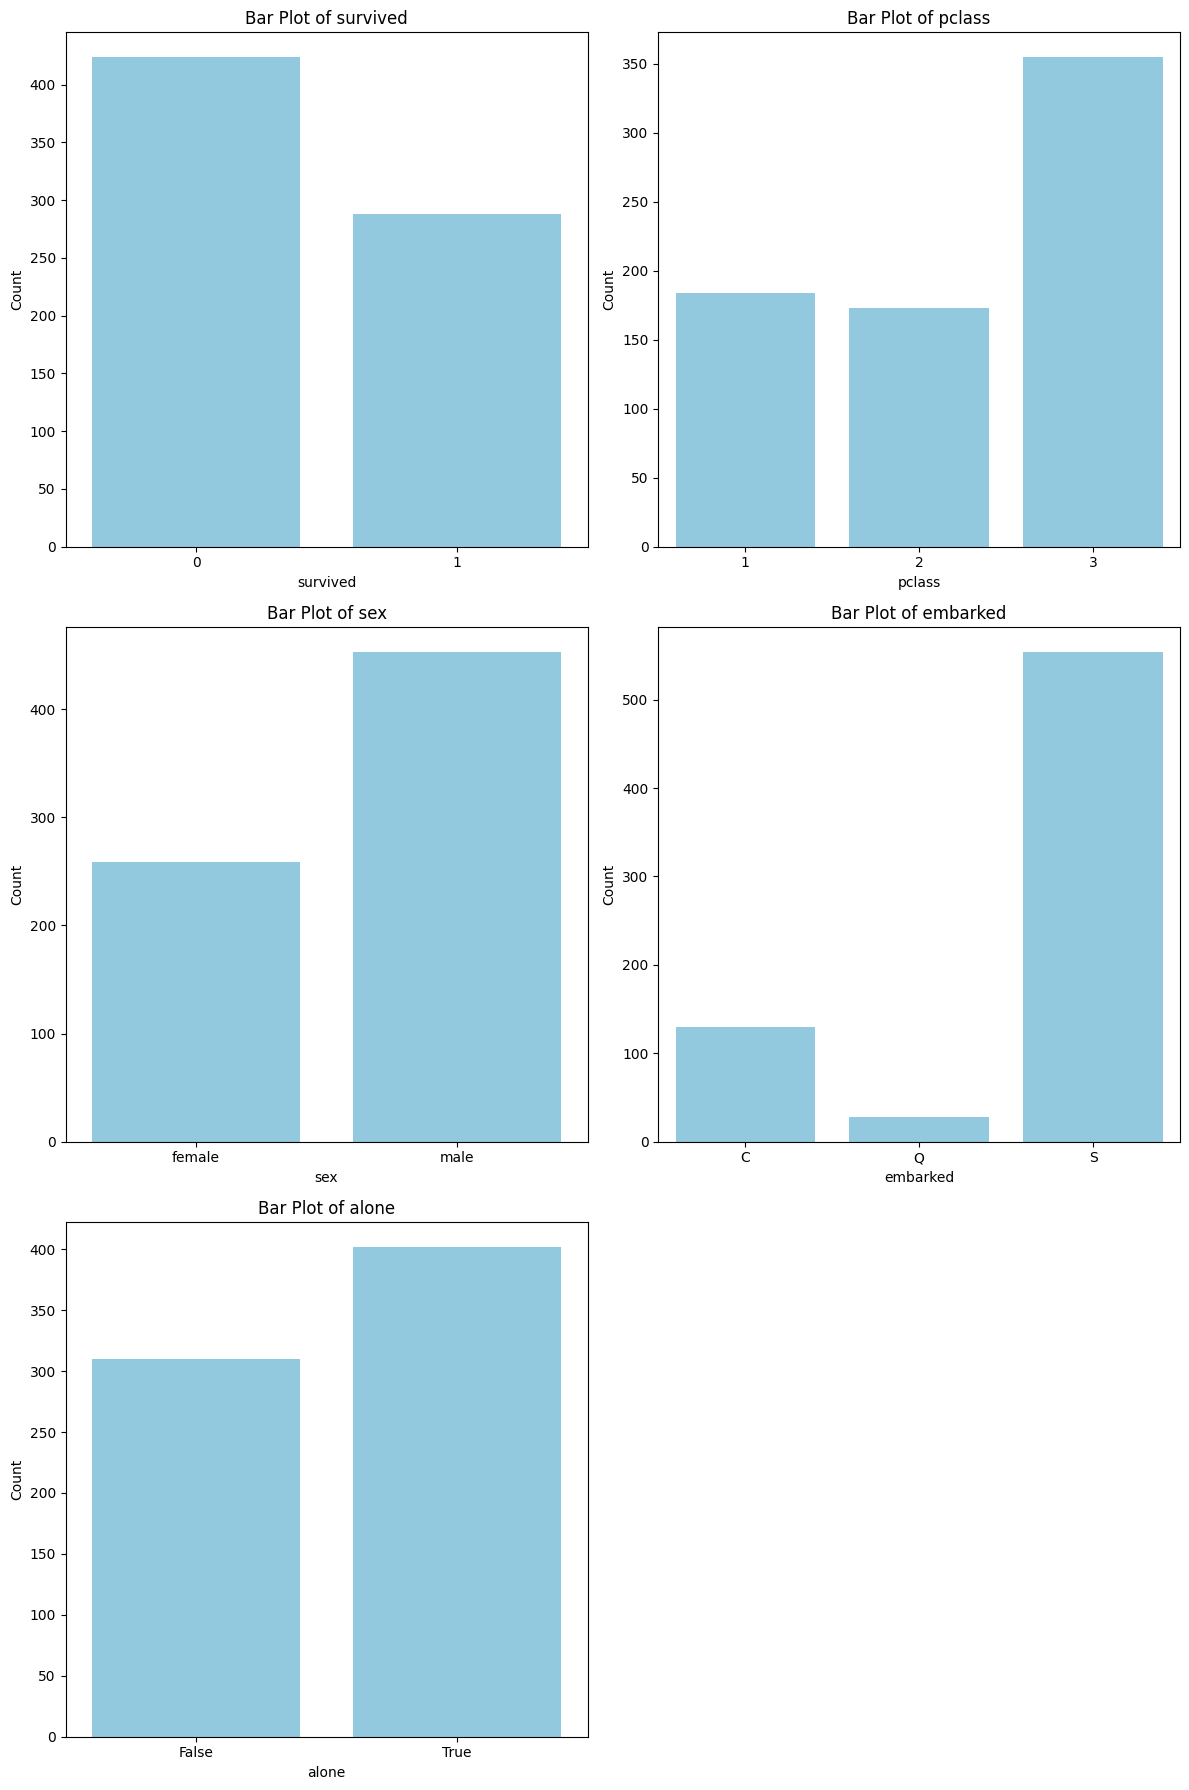

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have loaded the Titanic dataset into a DataFrame called df

# Filter out non-numerical columns for which to build bar plots
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# Set up subplots
num_plots = len(categorical_columns)
num_rows = num_plots // 2 + num_plots % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
axes = axes.flatten()

# Build bar plots for categorical features
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=col, data=df, ax=ax, color='skyblue')
    ax.set_title(f'Bar Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# If there are extra subplots, remove them
if len(categorical_columns) < len(axes):
    for j in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


- Number of deaths was greater than number of surviviors, most passangers were in the third class, most of them were male, most of them embarked from Southampton port and most of them were alone.

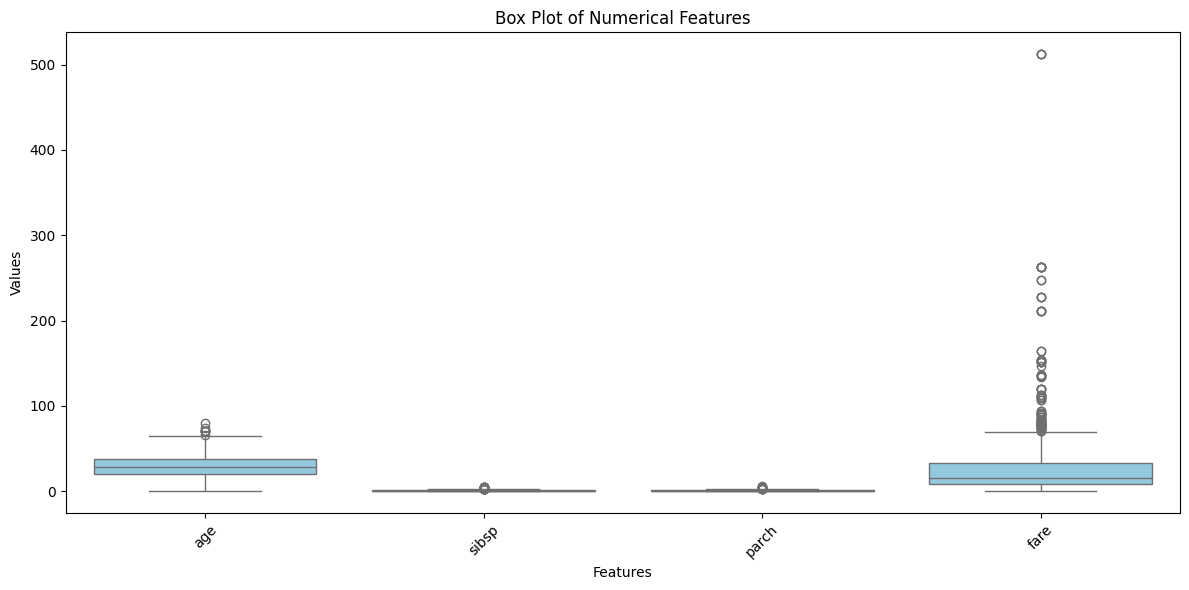

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have loaded the Titanic dataset into a DataFrame called df

# Filter out numerical columns for which to build box plots
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Concatenate numerical columns into a single DataFrame
df_numerical = pd.melt(df[numerical_columns])

# Plot a box plot for all numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_numerical, color='skyblue')
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [24]:
from sklearn.preprocessing import StandardScaler

# Assuming you already have loaded the Titanic dataset into a DataFrame called df

# Filter out numerical columns for standardization
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Now, df_standardized contains the standardized numerical features


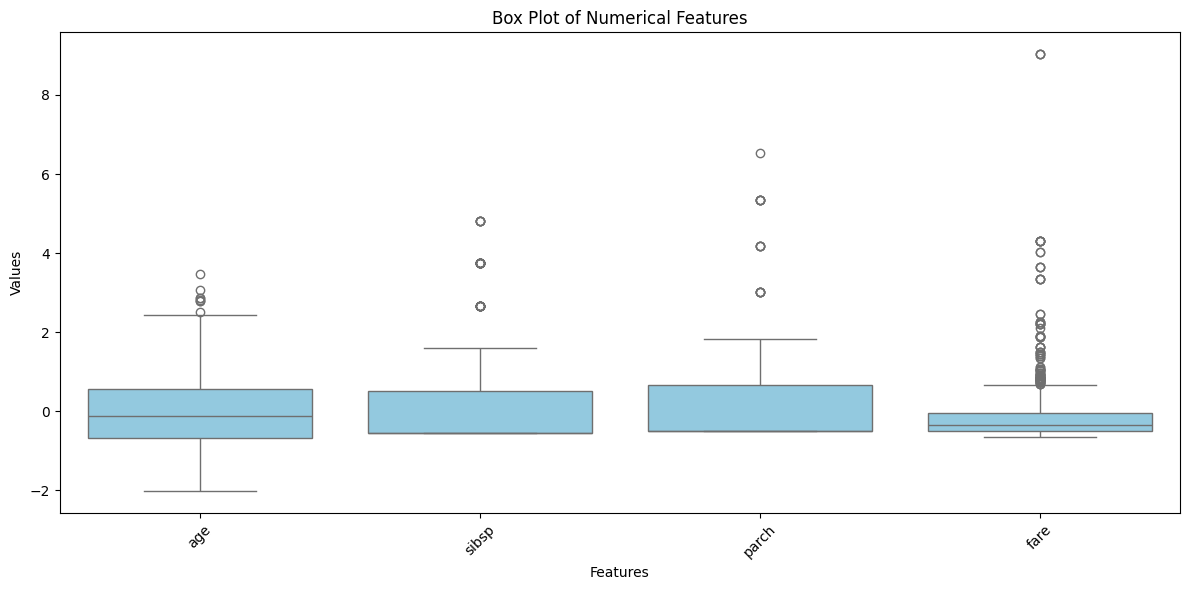

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have loaded the Titanic dataset into a DataFrame called df

# Filter out numerical columns for which to build box plots
numerical_columns = df_standardized.select_dtypes(include=['int64', 'float64']).columns

# Concatenate numerical columns into a single DataFrame
df_numerical = pd.melt(df_standardized[numerical_columns])

# Plot a box plot for all numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_numerical, color='skyblue')
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


##Bivariate Analysis

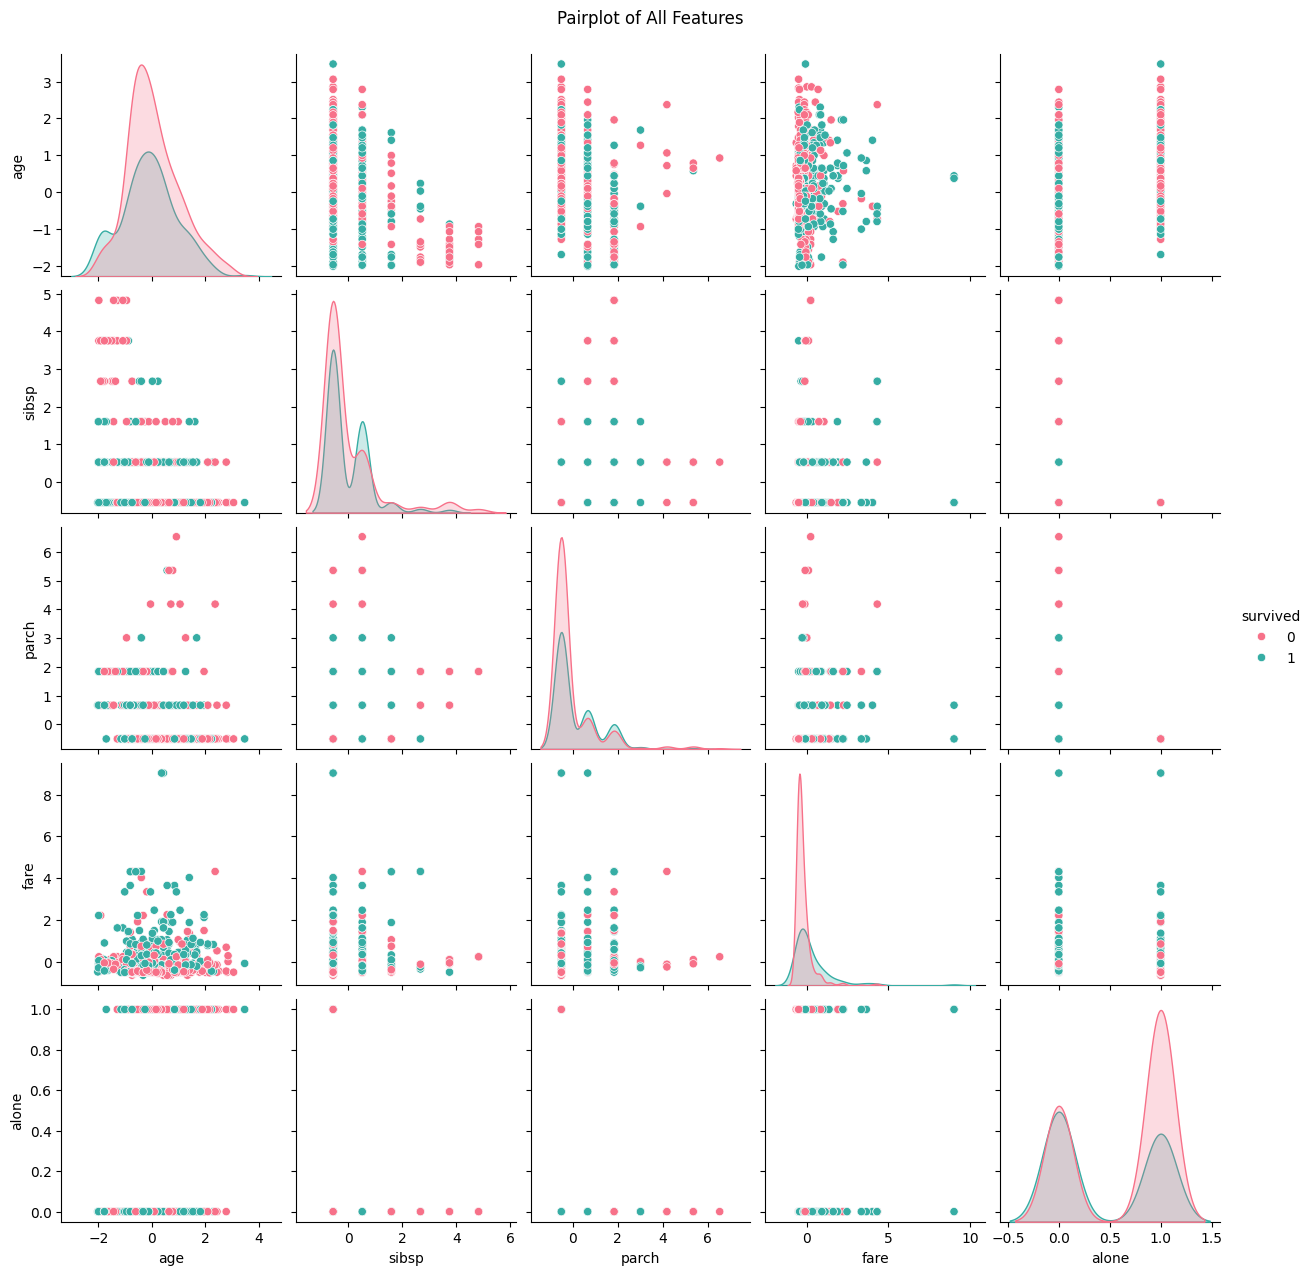

In [26]:
import seaborn as sns

# Assuming you already have loaded the Titanic dataset into a DataFrame called df

# Create pairplot for all features
sns.pairplot(df_standardized, hue='survived', palette='husl')
plt.suptitle('Pairplot of All Features', y=1.02)
plt.show()


###Correlation Matrix

<ipython-input-27-f8662a0f7447>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_standardized.corr()


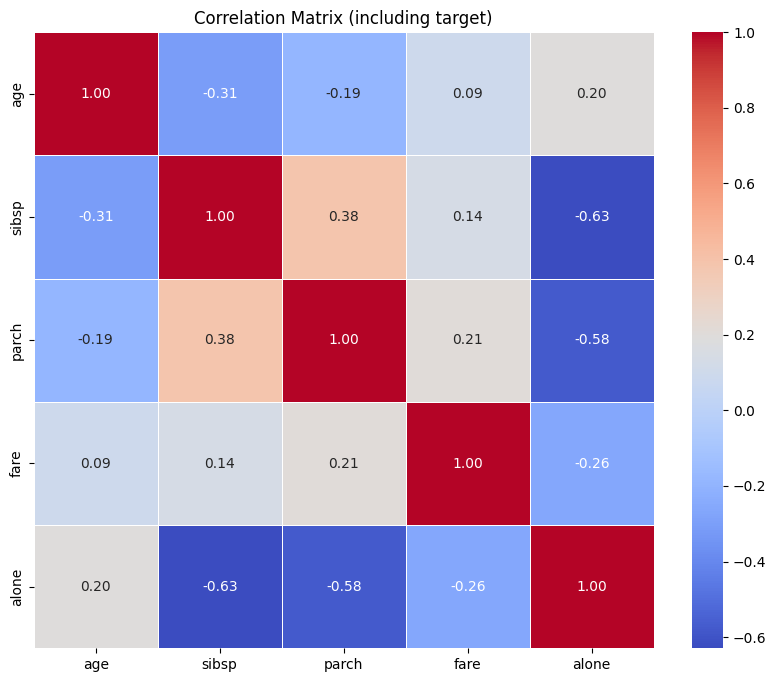

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have loaded the Titanic dataset into a DataFrame called df
# Assuming 'survived' is your target variable

# Compute the correlation matrix including the target variable
corr_matrix = df_standardized.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (including target)')
plt.show()


- The strongest correlations in the Dataset are the positive correlation between N of siblings / spouses and N of parents / children and the negative correlation between N of people that were alone and N of siblings / spouses and  N of people that were alone and N of parents / children.
- However, that correlations are still not that strong.

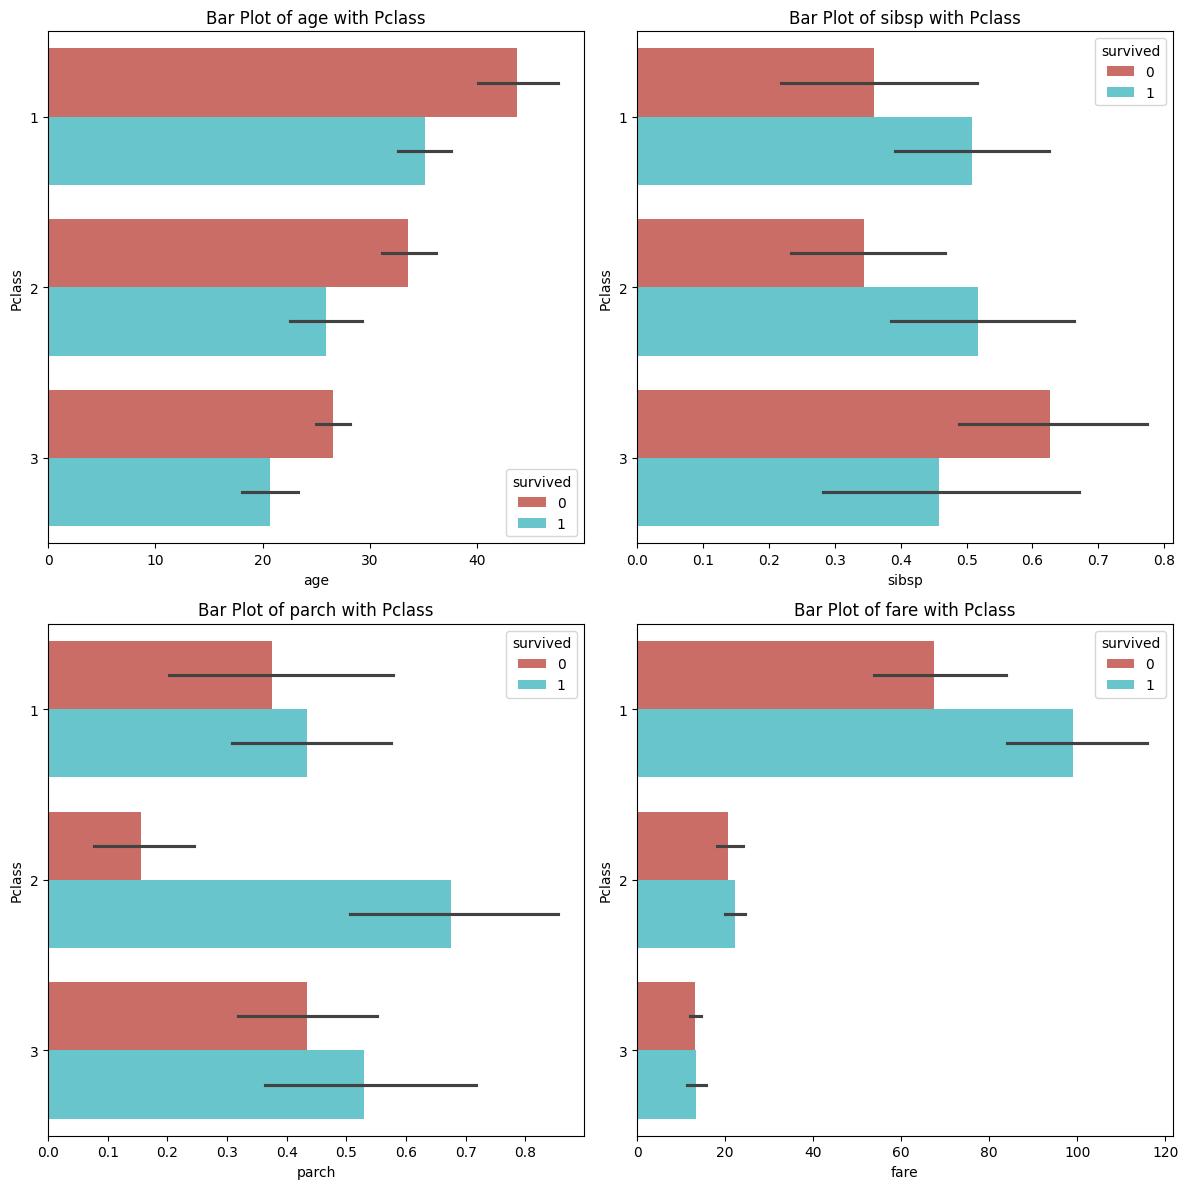

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have loaded the Titanic dataset into a DataFrame called df
# Assuming 'survived' is your target variable

# Set up subplots
num_plots = len(df_standardized.select_dtypes(include=['int64', 'float64']).columns)
num_rows = num_plots // 2 + num_plots % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
axes = axes.flatten()

# Build bar plots with 'pclass' as hue for all numerical variables
for i, col in enumerate(df_standardized.select_dtypes(include=['int64', 'float64']).columns):
    ax = axes[i]
    sns.barplot(x=col, y='pclass', data=df, hue='survived', ax=ax, palette='hls')
    ax.set_title(f'Bar Plot of {col} with Pclass')
    ax.set_xlabel(col)
    ax.set_ylabel('Pclass')

# If there are extra subplots, remove them
if len(df_standardized.select_dtypes(include=['int64', 'float64']).columns) < len(axes):
    for j in range(len(df_standardized.select_dtypes(include=['int64', 'float64']).columns), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


- In all the different classes the majority of deaths were from elderly people.
- For first and second class surviviours had a greater number of sibilings / spouses and for the third one it was the inverse.
- In all the three, the number of parents / children from who survived was greater than the number from those who died.
- First and second class passangers who died generally payd less for the fare those who survived. And for the third everyone paid the same amount.


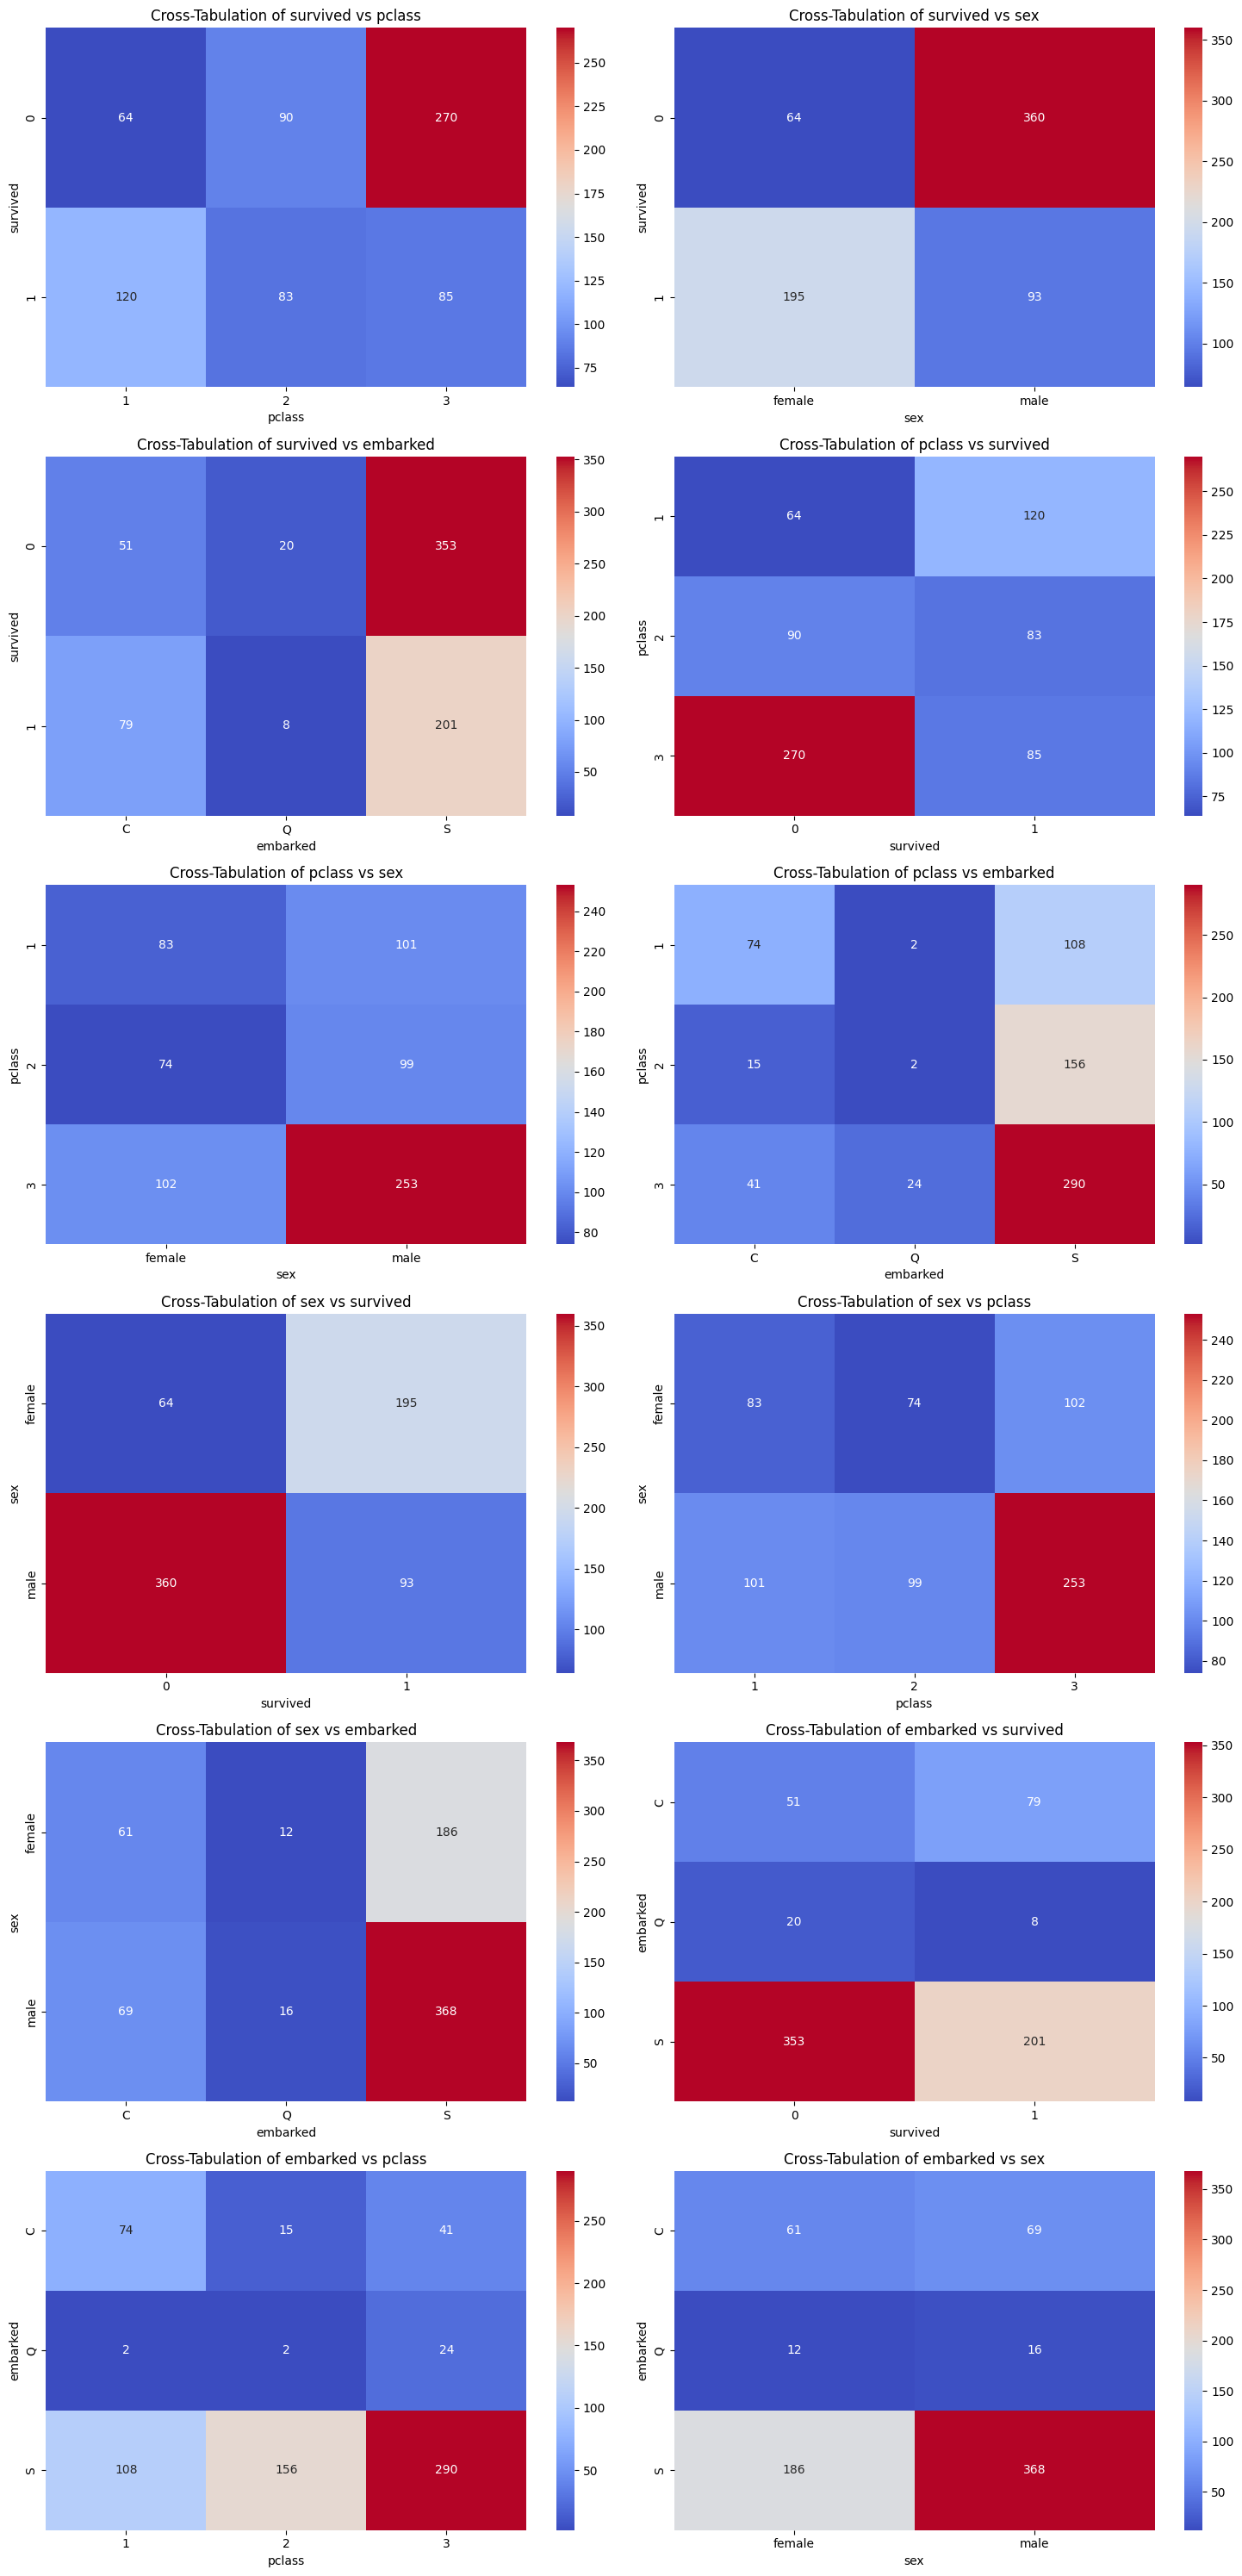

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get list of categorical columns
categorical_columns = df_standardized.select_dtypes(include=['object', 'category']).columns

# Set up subplots
num_plots = len(categorical_columns) * (len(categorical_columns) - 1)
num_rows = num_plots // 2 + num_plots % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Create cross-tabulations for all pairs of categorical variables and plot heatmaps
plot_index = 0
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i != j:  # Exclude self-cross-tabulations
            ax = axes[plot_index]
            # Create cross-tabulation
            cross_tab = pd.crosstab(df[col1], df[col2])
            # Plot heatmap
            sns.heatmap(cross_tab, ax=ax, annot=True, cmap='coolwarm', fmt='d')
            ax.set_title(f'Cross-Tabulation of {col1} vs {col2}')
            plot_index += 1

# If there are extra subplots, remove them
if num_plots < len(axes):
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


- Third class had the greatest number of deaths.
- Most of the surviviours were female.
- Most of people who died embarked from the Southampton Port.
- Most people in all the three different classes were male.
- Most people who embarked from the Southamptom Port were in the third class.


##Multivariate Analysis

Text(0.5, 1.0, 'Passenger Class VS Fare by survivor')

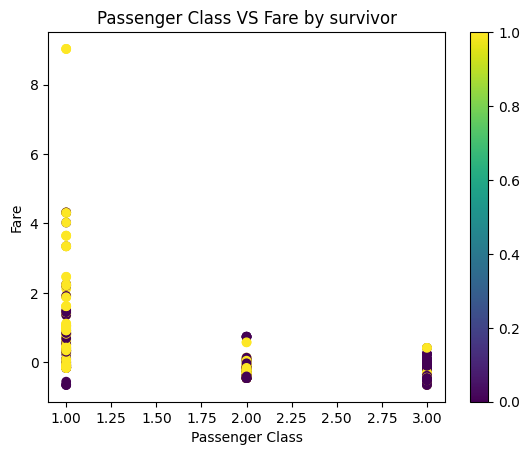

In [30]:
plt.colorbar(plt.scatter(df['pclass'],df_standardized['fare'],c=df_standardized['survived'],cmap='viridis'))
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Passenger Class VS Fare by survivor')

- In all the classes, people who paid a lowest fare died.

Text(0.5, 1.0, 'Age VS Sex by survivor')

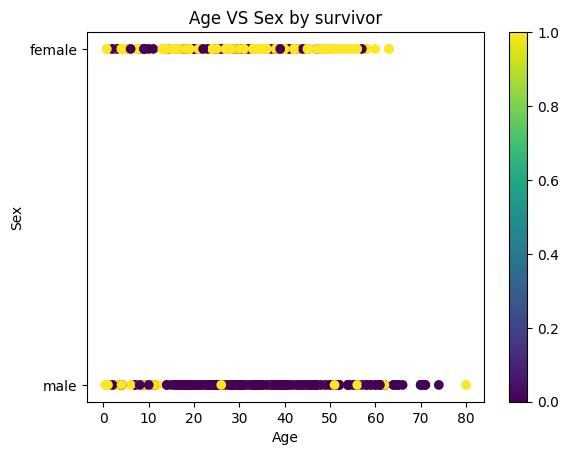

In [31]:
plt.colorbar(plt.scatter(df['age'],df_standardized['sex'],c=df_standardized['survived'],cmap='viridis'))
plt.xlabel('Age')
plt.ylabel('Sex')
plt.title('Age VS Sex by survivor')

- Numer of female survived were greater than the number of male and their ages were well distributed. On the other hand, mostly the younger men were the ones who survived.

Text(0.5, 1.0, 'Fare VS Parch by sex')

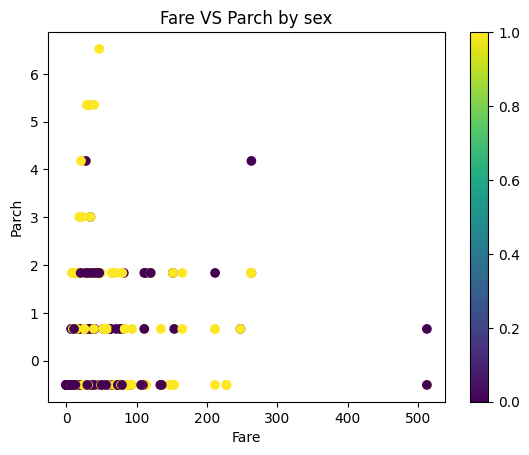

In [32]:
# Map male to 0 and female to 1
df_standardized['sex_numerical'] = df_standardized['sex'].map({'male': 0, 'female': 1})

# Use the mapped values for color
plt.colorbar(plt.scatter(df['fare'],df_standardized['parch'],c=df_standardized['sex_numerical'],cmap='viridis'))
plt.xlabel('Fare')
plt.ylabel('Parch')
plt.title('Fare VS Parch by sex')

- People who paid the greatest prices for the fare died and had less number of parents / children.
- People who survived had a bigger number of parents / children.

Text(0.5, 1.0, 'Parch VS Sibsp by age')

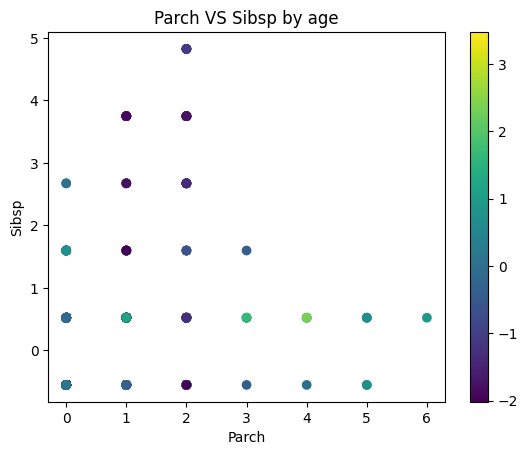

In [33]:
plt.colorbar(plt.scatter(df['parch'],df_standardized['sibsp'],c=df_standardized['age'],cmap='viridis'))
plt.xlabel('Parch')
plt.ylabel('Sibsp')
plt.title('Parch VS Sibsp by age')

- People with the greatest number of sibilings / spouses had a smaller number of parents / children and were younger.

#Baseline Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you already have loaded the Titanic dataset into a DataFrame called df_standardized
# Assuming 'survived' is your target variable

# Select numerical features
numerical_features = df_standardized.select_dtypes(include=['int64', 'float64'])

# Select target variable
target_variable = df_standardized['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_features, target_variable, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        80
           1       0.75      0.38      0.51        63

    accuracy                           0.67       143
   macro avg       0.70      0.64      0.63       143
weighted avg       0.69      0.67      0.64       143



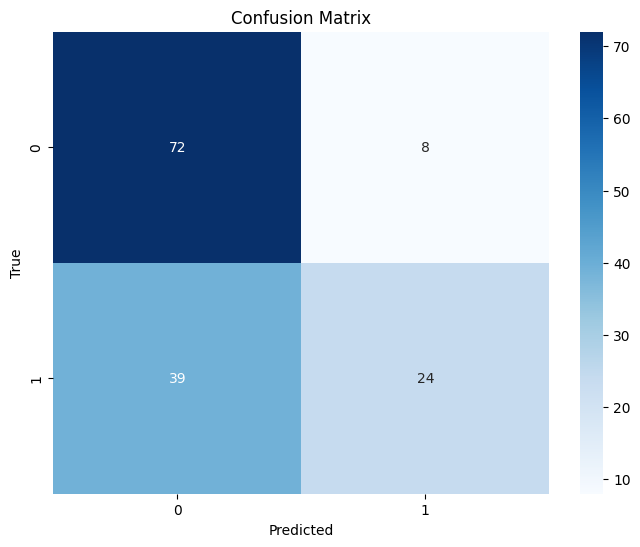

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Creating and training the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Making predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluating the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')

# Getting classification report
classification_rep_tree = classification_report(y_test, y_pred_tree)
print("\nClassification Report for Decision Tree:")
print(classification_rep_tree)


Decision Tree Accuracy: 0.65

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        80
           1       0.61      0.59      0.60        63

    accuracy                           0.65       143
   macro avg       0.64      0.64      0.64       143
weighted avg       0.65      0.65      0.65       143



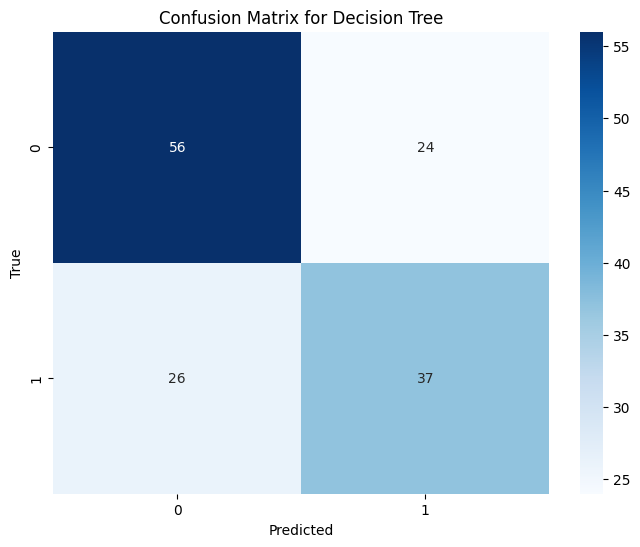

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


#Naive Bayes

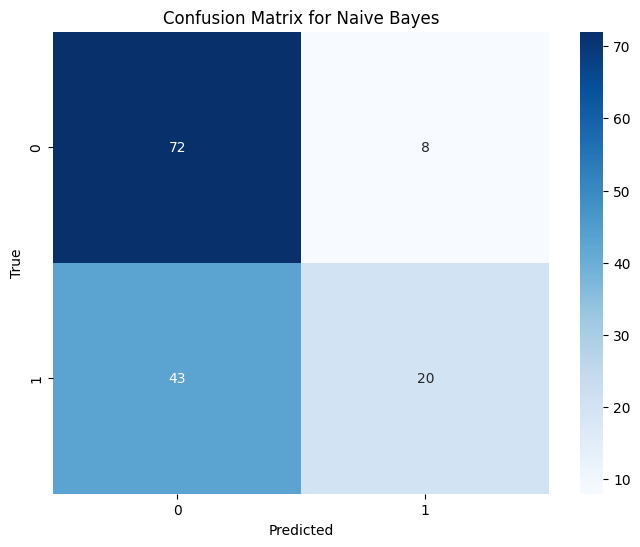

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creating and training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions using the Naive Bayes model
y_pred_nb = nb_model.predict(X_test)

# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


#Remove Outliers

In [39]:
import numpy as np
from scipy import stats

# Assuming your DataFrame is named df

# Define a threshold for the Z-score
z_threshold = 3

# Calculate the Z-scores for each numerical column
z_scores = stats.zscore(df.select_dtypes(include=['int64', 'float64']))

# Get the absolute Z-scores
abs_z_scores = np.abs(z_scores)

# Create a boolean mask for outliers
outlier_mask = (abs_z_scores < z_threshold).all(axis=1)

# Filter the DataFrame to remove outliers
df_no_outliers = df[outlier_mask]


#Baseline outliers removed

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you already have loaded the Titanic dataset into a DataFrame called df_standardized
# Assuming 'survived' is your target variable

# Select numerical features
numerical_features = df_no_outliers.select_dtypes(include=['int64', 'float64'])

# Select target variable
target_variable = df_no_outliers['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_features, target_variable, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.79        73
           1       0.83      0.50      0.62        58

    accuracy                           0.73       131
   macro avg       0.76      0.71      0.71       131
weighted avg       0.76      0.73      0.72       131



#DT Regression with outliers removed

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming df_no_outliers is the DataFrame after removing outliers

# Selecting only numerical features
numerical_features = df_no_outliers.select_dtypes(include=['int64', 'float64'])

# Selecting target variable
target_variable = df_no_outliers['survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_features, target_variable, test_size=0.2, random_state=42)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')


Decision Tree Accuracy: 0.65
Logistic Regression Accuracy: 0.73


#Naive Bayes Regression with removed outliers

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Selecting only numerical features
numerical_features = df_no_outliers.select_dtypes(include=['int64', 'float64'])

# Selecting target variable
target_variable = df_no_outliers['survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_features, target_variable, test_size=0.2, random_state=42)

# Creating and training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluating the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')


Naive Bayes Accuracy: 0.76


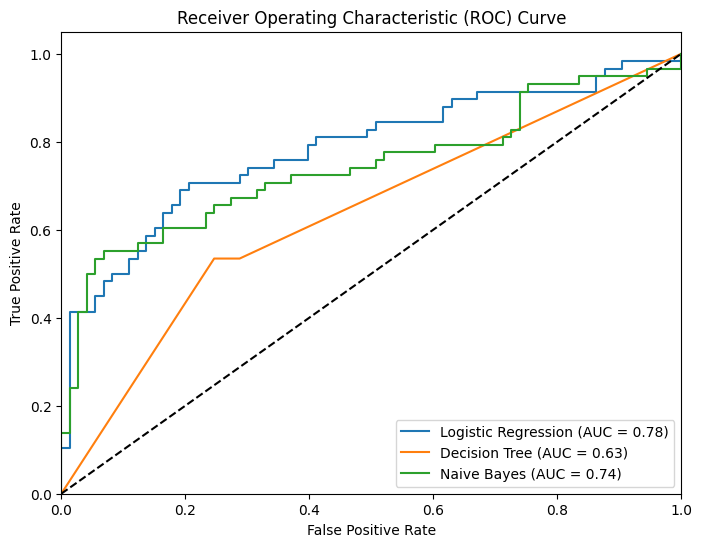

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for Logistic Regression
y_pred_proba_lr = model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Compute ROC curve and ROC area for Decision Tree
y_pred_proba_dt = tree_model.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Compute ROC curve and ROC area for Naive Bayes
y_pred_proba_nb = nb_model.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score
import pandas as pd


# Define pipeline with feature selection and logistic regression
pipeline = Pipeline([
    ('selector', SelectKBest()),
    ('model', LogisticRegression(penalty='l1', solver='liblinear'))  # Using L1 penalty only
])

# Define hyperparameters grid for grid search
param_grid = {
    'selector': [SelectKBest(score_func=f_classif), SelectKBest(score_func=mutual_info_classif)],  # Feature selection methods
    'selector__k': [1, 2, 3, 'all'],   # Number of features to select
    'model__C': [0.1, 1, 10],           # Regularization parameter for logistic regression
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best feature selection method, hyperparameters, and corresponding accuracy score
print("Best Feature Selection Method and Hyperparameters:")
print(grid_search.best_params_)
print()
print("Best Accuracy Score:")
print(grid_search.best_score_)


Best Feature Selection Method and Hyperparameters:
{'model__C': 10, 'selector': SelectKBest(k=3, score_func=<function mutual_info_classif at 0x7ba70034b130>), 'selector__k': 3}

Best Accuracy Score:
0.6984981684981685


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Define pipeline with logistic regression (using L1 penalty)
pipeline = Pipeline([
    ('selector', SelectKBest(score_func=f_classif)),  # Using F-statistic for feature selection initially
    ('model', LogisticRegression(penalty='l1', solver='liblinear'))  # Using L1 penalty for logistic regression
])

# Define hyperparameters grid for grid search
param_grid = {
    'selector': [SelectKBest(score_func=f_classif), SelectKBest(score_func=mutual_info_classif)],  # Different feature selection methods
    'selector__k': [1, 2, 3, 'all'],   # Number of features to select
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best feature selection method, hyperparameters, and corresponding accuracy score
print("Best Feature Selection Method and Hyperparameters:")
print(grid_search.best_params_)
print()
print("Best Accuracy Score:")
print(grid_search.best_score_)


Best Feature Selection Method and Hyperparameters:
{'selector': SelectKBest(k='all'), 'selector__k': 'all'}

Best Accuracy Score:
0.6908608058608058
